# Sales Forecasting


<img src="images/sales.jpg", width=1000, height=500></img>

<b>Source:</b> https://www.slideshare.net/SubhankarBasak3/sales-data-analysis-with-explanation-and-regional-overview-prediction-analysis

### Top 5 Reasons for Sales Forecasting 
<ol>
<li><b>Demand Forecasting</b></li>
Best tool to get a good estimate of the demand for the products sold
<li><b>Higher On Time In Full (OTIF) Delivery</b></li>
Guarantee that sufficient product are ordered to service customers on a timely basis - results in happier customers 
<li><b>Inventory Controls</b></li>
The company will be better equipped to manage its inventory. With an increase in accuracy in sales forecast, both overstock and stock-out situations will be avoided.
<li><b>Financial Planning</b></li>
Business will have better insight at prediciting revenues and profits by anticipating their sales.
<li><b>Marketing</b></li>
Sales forecasting gives marketing an advanced look at future sales and offers the opportunity to schedule promotions if it appears that the sales are going to be weak. In extreme cases, sales forecasts may lead to discontinuing slow-moving products.
</ol>

<b>Source:</b> https://yourbusiness.azcentral.com/top-10-reasons-sales-forecasting-important-24818.html


<p><b>Sales forecasting</b> is a key element for conducting a <b>successfull</b> business.
Good forecasting can help in <b>developping</b> and <b>improving</b> strategic plans by giving increasing the knowledge of the <b>marketplace</b>.</p>

## Data

<p>Healthcare Pharmacy Sales From 01-02-2017 to 06-31-2017</p>
<img src="images/pharm.png", width=250, height=250, align="Left"></img>


### Requirements 

In [128]:
import pandas as pd
import numpy as np
import re
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
rcParams['figure.figsize'] = 15, 6

### Data Preprocessing

In [2]:
#Get Data into panda dataframe
df = pd.read_excel("avril-juin.xls")
df2 = pd.read_excel("janv-mars.xls")
df = df.append(df2)

In [3]:
#view data size
df.shape

(41113, 25)

In [4]:
#keeping one record of a transaction
df = df.drop_duplicates(subset=['Number'], keep="first")
df.shape

(19355, 25)

In [5]:
#Removing Time from Date-Time Object
df['Dates'] = [str(date).split()[0] for date in df['Date']]
df['Dates'] = pd.to_datetime(df.Dates).dt.date
data = df[['Dates','Number']]
df = data.groupby(['Dates']).size()
df.index

Index([2017-01-02, 2017-01-03, 2017-01-04, 2017-01-05, 2017-01-06, 2017-01-13,
       2017-01-14, 2017-01-15, 2017-01-16, 2017-01-17,
       ...
       2017-11-03, 2017-11-04, 2017-11-05, 2017-11-06, 2017-12-01, 2017-12-02,
       2017-12-03, 2017-12-04, 2017-12-05, 2017-12-06],
      dtype='object', name=u'Dates', length=178)

In [6]:
df.head(2)

Dates
2017-01-02    120
2017-01-03    117
dtype: int64

+ Visualize Number of sales 

Text(0.5,1,u'Sales vs Time')

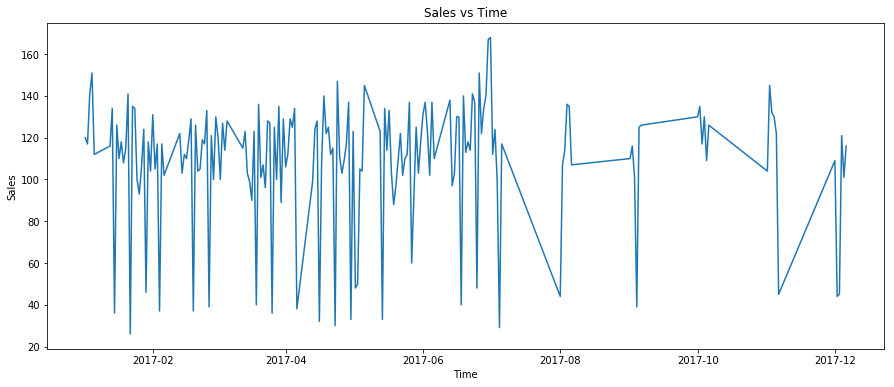

In [42]:
plt.plot(df)
plt.xlabel("Time")
plt.ylabel("Sales")
plt.title("Sales vs Time")

### MAX-MIN

In [154]:
print 'MAX:', dfT.Clients.max()
print 'Date:', dfT[dfT.Clients==dfT.Clients.max()].index[0].date()
print 'MIN:',dfT.Clients.min()
print 'Date:',dfT[dfT.Clients==dfT.Clients.min()].index[0].date()

MAX: 167
Date: 2017-06-30
MIN: 26
Date: 2017-01-22


#### External Data 1
+ Add Temperature 
<p><b>Source:</b> https://www.ncdc.noaa.gov/cdo-web/search</p>

In [8]:
#temperature to datframe
df_temp = pd.read_csv("t.csv")

In [9]:
df_t = pd.DataFrame()
df_t['Dates'] = df_temp.DATE
df_t['temp'] = df_temp.TAVG
df_t = df_t.drop_duplicates(subset=['Dates'], keep="first")
df_t['Dates'] = pd.to_datetime(df_t.Dates).dt.date

In [10]:
#Setting the index to dates for it to become a time series
df_t = df_t.set_index('Dates')

+ visualize Temperature

Text(0.5,1,u'Temperature vs Time')

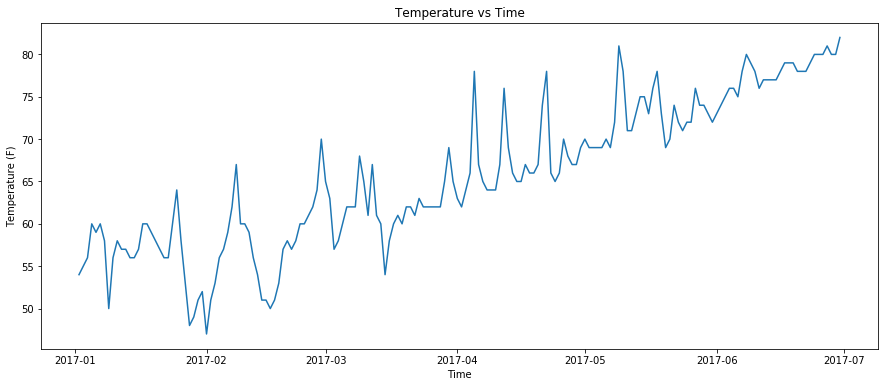

In [44]:
plt.plot(df_t)
plt.xlabel("Time")
plt.ylabel("Temperature (F)")
plt.title("Temperature vs Time")

+ oil

#### External Data 2
+ Add Oil Prices 
<p><b>Source:</b>  https://www.eia.gov/dnav/pet/hist/LeafHandler.ashx?n=PET&s=RBRTE&f=D</p>


<p>The <b>increase in oil price</b> can have a <b>positive</b> impact on the Lebanese <b>economy</b> - 
www.undp.org/content/dam/lebanon/docs/MDG/Publications/MDG_en.pdf</p>

In [12]:
# oil DataFrame
df_oil = pd.read_excel("oil.xls")
df_o = pd.DataFrame()
df_o['Dates'] = df_oil.Date
df_o['CrudeOil'] = df_oil.CrudeOil
df_o = df_o.drop_duplicates(subset=['Dates'], keep="first")
df_o['Dates'] = pd.to_datetime(df_o.Dates).dt.date
df_o = df_o.set_index('Dates')


+ Vizualise Oil Price

Text(0.5,1,u'Oil vs Time')

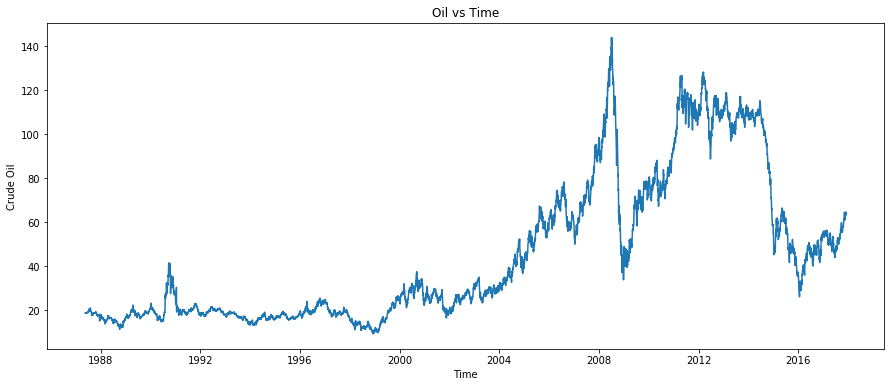

In [45]:
plt.plot(df_o)
plt.xlabel("Time")
plt.ylabel("Crude Oil")
plt.title("Oil vs Time")

#### External Data 3
+ Inflation Rate 
<p><b>Source:</b>https://fred.stlouisfed.org/search?st=lebanon</p>

In [14]:
##Inflation Data Frame
df_inflation = pd.read_excel("inflation.xls")
df_i = pd.DataFrame()
df_i['Dates'] = df_inflation.Dates
df_i['Inflation'] = df_inflation.inflation
df_i = df_i.drop_duplicates(subset=['Dates'], keep="first")
df_i['Dates'] = pd.to_datetime(df_i.Dates).dt.date
df_i = df_i.set_index('Dates')


+ Vizualise Inflation Rate

Text(0.5,1,u'Inflation vs Time')

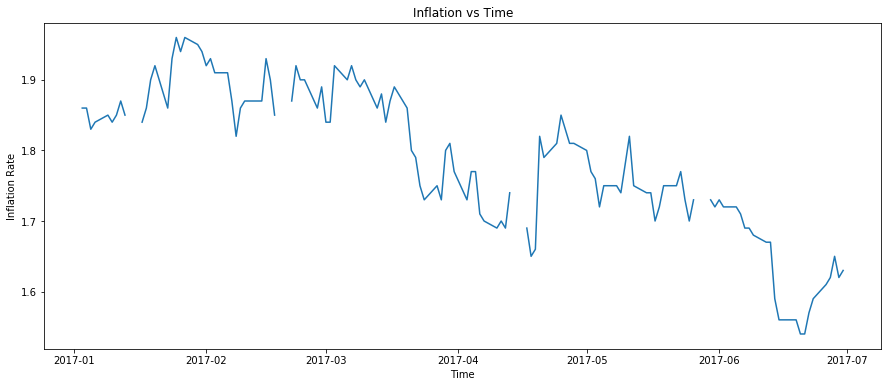

In [46]:
plt.plot(df_i)
plt.xlabel("Time")
plt.ylabel("Inflation Rate")
plt.title("Inflation vs Time")

#### Data Transformation 
Date Time to weekday

In [16]:
def date2day(dt):
    return dt.timetuple()[6]

## Combine

In [17]:
#Concactinate all of the external data
dfT = pd.concat([df, df_t], axis=1, join_axes=[df.index])
dfT = pd.concat([dfT, df_o], axis=1, join_axes=[df.index])
dfT = pd.concat([dfT, df_i], axis=1, join_axes=[df.index])
dfT['Weekday'] = [date2day(row) for row in dfT.index]
dfT.columns = ['Clients', 'temp', 'CrudeOil', 'inflation','Weekday']

In [18]:
#Set the index to a datetime type
dfT.index = dfT.index.astype('datetime64[ns]')
dfT.index

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-13', '2017-01-14', '2017-01-15',
               '2017-01-16', '2017-01-17',
               ...
               '2017-11-03', '2017-11-04', '2017-11-05', '2017-11-06',
               '2017-12-01', '2017-12-02', '2017-12-03', '2017-12-04',
               '2017-12-05', '2017-12-06'],
              dtype='datetime64[ns]', name=u'Dates', length=178, freq=None)

In [19]:
dfT['2017-03']

,Clients,temp,CrudeOil,inflation,Weekday
Dates,,,,,
2017-03-01,130,65.0,55.72,1.84,2
2017-03-02,120,63.0,54.16,1.84,3
2017-03-03,100,57.0,54.12,1.92,4
2017-03-04,127,58.0,NaN,NaN,5
2017-03-05,114,60.0,NaN,NaN,6
2017-03-06,128,62.0,54.73,1.90,0
2017-03-13,115,61.0,50.10,1.86,0
2017-03-14,123,60.0,49.60,1.88,1
2017-03-15,103,54.0,50.63,1.84,2


### Cleaning

In [20]:
dfT = dfT['2017-01-01':'2017-06-30'] #cleaning data from other months than said in the data sheet 

In [21]:
dfT.isnull().sum()

Clients       0
temp          0
CrudeOil     39
inflation    42
Weekday       0
dtype: int64

<b>Filling missing value</b> with the closest non-null value in our time series,
<p><b>Source:</b> https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-visualization-with-python-3<p>

In [22]:
dfT = dfT.fillna(dfT.bfill())
dfT.isnull().sum()

Clients      0
temp         0
CrudeOil     0
inflation    0
Weekday      0
dtype: int64

In [23]:
#Make sure
dfT['2017-03']

,Clients,temp,CrudeOil,inflation,Weekday
Dates,,,,,
2017-03-01,130,65.0,55.72,1.84,2
2017-03-02,120,63.0,54.16,1.84,3
2017-03-03,100,57.0,54.12,1.92,4
2017-03-04,127,58.0,54.73,1.90,5
2017-03-05,114,60.0,54.73,1.90,6
2017-03-06,128,62.0,54.73,1.90,0
2017-03-13,115,61.0,50.10,1.86,0
2017-03-14,123,60.0,49.60,1.88,1
2017-03-15,103,54.0,50.63,1.84,2


#### Visualize all 

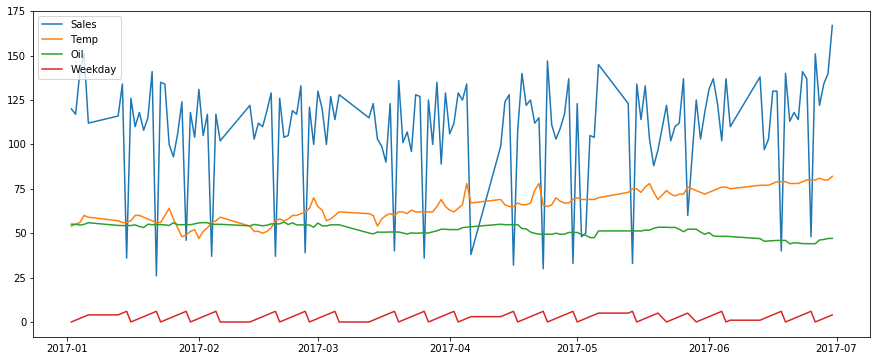

In [52]:
#plt.plot(dfT)
plt.plot(dfT.index, dfT.Clients)
plt.plot(dfT.index, dfT.temp)
plt.plot(dfT.index, dfT.CrudeOil)
plt.plot(dfT.index, dfT.Weekday)

plt.legend(['Sales', 'Temp', 'Oil', 'Weekday'], loc='upper left')

plt.show()

## REGRESSION

+ using stats model

<p><b>Source:</b>https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9</p>

In [25]:
# define the data/predictors as the pre-set feature names 
feature_names = ['temp', 'CrudeOil', 'inflation','Weekday']
data = dfT[feature_names]

# Put the target in another DataFrame
target = pd.DataFrame(dfT.Clients, columns=["Clients"])

In [26]:
X = data["temp"] ## X usually means our input variables (or independent variables)
y = target["Clients"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## adds an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Clients   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.549
Date:                Mon, 11 Dec 2017   Prob (F-statistic):              0.215
Time:                        15:30:08   Log-Likelihood:                -684.11
No. Observations:                 142   AIC:                             1372.
Df Residuals:                     140   BIC:                             1378.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.6287     18.985      4.510      0.000      48.095     123.162
temp           0.3583      0.288      1.245      0.215      -0.211       0.927
==============================================================================
Omnibus:                       36.954   Durbin-Watson:                   2.475
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.586
Skew:                          -1.399   Prob(JB):                     8.51e-13
Kurtosis:                       4.250   Cond. No.                         495.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
X = data["Weekday"]
y = target["Clients"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Clients   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     163.2
Date:                Mon, 11 Dec 2017   Prob (F-statistic):           2.63e-25
Time:                        15:30:08   Log-Likelihood:                -818.35
No. Observations:                 142   AIC:                             1639.
Df Residuals:                     141   BIC:                             1642.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Weekday       23.6830      1.854     12.774      0.000      20.018      27.348
==============================================================================
Omnibus:                       11.156   Durbin-Watson:                   1.423
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.907
Skew:                          -0.708   Prob(JB):                      0.00260
Kurtosis:                       3.098   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Using More than just one variable

In [28]:
X = data[["temp","inflation","CrudeOil","Weekday"]]
y = target["Clients"]
         
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Clients   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     556.3
Date:                Mon, 11 Dec 2017   Prob (F-statistic):           4.99e-84
Time:                        15:30:08   Log-Likelihood:                -671.26
No. Observations:                 142   AIC:                             1351.
Df Residuals:                     138   BIC:                             1362.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
temp           0.8008      0.192      4.161      0.000       0.420       1.181
inflation     20.5460     31.813      0.646      0.519     -42.359      83.451
CrudeOil       0.7348      1.095      0.671      0.503      -1.430       2.900
Weekday       -6.2576      1.176     -5.323      0.000      -8.582      -3.933
==============================================================================
Omnibus:                       10.058   Durbin-Watson:                   2.146
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.364
Skew:                          -0.655   Prob(JB):                      0.00562
Kurtosis:                       3.186   Cond. No.                     1.14e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Generally whenever a variable is added to a regression model --> R² increases.
This model has a much higher R-squared value:0.942 --> The model explains 94.8% of the variance in our dependent variable

### Predictions
+ With sklearn
<p><b>Source:</b>https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6</p>

In [95]:
# Build Model
X =  data[["temp","CrudeOil","Weekday"]]
y = target['Clients']
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [96]:
predictions = lm.predict(X)
print(predictions)[0:5]

[ 123.74262666  117.63956878  111.62471196  106.26201874   99.44671931]


In [97]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#print X_train.shape, y_train.shape
#print X_test.shape, y_test.shape

In [98]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [156]:
#plt.scatter(y_test, predictions)
#plt.xlabel('True Values')
#plt.ylabel('Predictions')

In [100]:
print ('Score:', model.score(X_test, y_test))

('Score:', 0.20470194712194734)


### Predict from new outside data

In [109]:
dfp = pd.read_excel("predi.xlsx")
dfp.index = dfp.Date

In [111]:
dfp = dfp[['temp','CrudeOil','Weekday']]
dfp.head(2)

,temp,CrudeOil,Weekday
Date,,,
2017-07-01,85,49.13,6
2017-07-02,86,49.13,7


In [117]:
p = pd.DataFrame()
p["Predict"] = lm.predict(dfp)
dfp["Predict"] = lm.predict(dfp)

In [116]:
#Show predictions
p

,Predict
0,101.520908
1,96.165324
2,137.523556
3,132.167972
4,125.522673
5,120.167090
6,113.521790
7,108.166207
8,102.165766


In [126]:
#### Visualize prediction

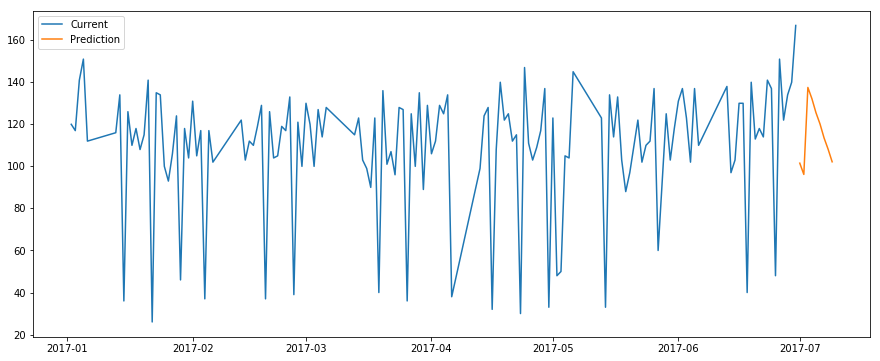

In [127]:
plt.plot(dfT.index, dfT.Clients)
plt.plot(dfp.index, dfp.Predict)

plt.legend(['Current', 'Prediction'], loc='upper left')

plt.show()

## Up Next: Time Series Predictions ?
+ ARIMA Model